### REGRESIÓN 1 PARA PREDECIR LAS NOTAS

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats # libreria estadistica de Scipy
from sklearn.feature_selection import RFE # RFE es para seleccionar modelos
from sklearn.model_selection import train_test_split # para dividir la base en train y test
from sklearn import linear_model # para modelo lineal
from sklearn.metrics import mean_squared_error, r2_score # para sacar las metricas
import statsmodels.api as sm  ## Parte estadistica
from statsmodels.sandbox.regression.predstd import wls_prediction_std  ## Parte estadistica



In [15]:
ruta_archivo ="../Datos/regresion/student-mat.csv"

In [16]:
datos = pd.read_csv(ruta_archivo, delimiter=';', na_values="-")
datos


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [17]:
hay_na = datos.isna().any().any()
print("¿Hay valores NA en el DataFrame?:", hay_na)

¿Hay valores NA en el DataFrame?: False


In [18]:
# Seleccionar solo las columnas numéricas del DataFrame
datos_numericos = datos.select_dtypes(include=['float64', 'int64'])

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(datos_numericos.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10  


In [19]:
datos_numericos.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [20]:
# Calcular la matriz de correlación
correlacion = datos_numericos.corr()

# Mostrar la matriz de correlación
correlacion

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Correlación con G1:

- failures: -0.3547 (correlación negativa moderada)
- Medu: 0.2053 (correlación positiva leve)
- Fedu: 0.1902 (correlación positiva leve)
- studytime: 0.1606 (correlación positiva leve)
- Dalc (consumo de alcohol diario): -0.0941 (correlación negativa leve)
- goout: -0.1491 (correlación negativa leve)



Correlación con G2:



- failures: -0.3558 (correlación negativa moderada)
- Medu: 0.2155 (correlación positiva leve)
- Fedu: 0.1648 (correlación positiva leve)
- studytime: 0.1358 (correlación positiva leve)
- Dalc: -0.0641 (correlación negativa leve)
- goout: -0.1622 (correlación negativa leve)



Correlación con G3:


- failures: -0.3604 (correlación negativa moderada)
- Medu: 0.2171 (correlación positiva leve)
- Fedu: 0.1524 (correlación positiva leve)
- studytime: 0.0978 (correlación positiva leve)
- Dalc: -0.0546 (correlación negativa leve)
- goout: -0.1327 (correlación negativa leve)



Variables recomendadas para la regresión:


- failures: La variable "failures" tiene una correlación negativa moderada con todas las notas (G1, G2, G3), lo que la convierte en una de las mejores candidatas.
- Medu: El nivel de educación de la madre tiene una correlación positiva con las notas, especialmente con G2 y G3.
- Fedu: El nivel de educación del padre también muestra una correlación positiva, aunque más débil que "Medu".
- studytime: El tiempo de estudio tiene una correlación positiva leve con las tres notas, lo que indica que puede influir en el rendimiento académico.
- goout: El tiempo que pasan los estudiantes saliendo tiene una correlación negativa leve con las notas, lo que sugiere que salir más podría tener un impacto negativo en las notas.
- Dalc: El consumo de alcohol diario tiene una correlación negativa leve con las notas.

## Modelo de regresión lineal múltiple

In [21]:
import pandas as pd
import statsmodels.api as sm

# Variables predictoras seleccionadas basadas en el análisis de correlación
X = datos[['failures', 'Medu', 'Fedu', 'studytime', 'goout', 'Dalc']]

# Variables objetivo (en este caso, usaremos una sola, por ejemplo, G3)
y = datos['G3']  # Nota final que queremos predecir

# Añadir una constante al modelo (intercepto)
X = sm.add_constant(X)

# Crear un modelo OLS
modelo = sm.OLS(y, X)

# Ajustar el modelo
resultado = modelo.fit()

# Imprimir el resumen del modelo
print(resultado.summary())



                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     12.33
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.02e-12
Time:                        20:46:25   Log-Likelihood:                -1126.7
No. Observations:                 395   AIC:                             2267.
Df Residuals:                     388   BIC:                             2295.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3141      1.065      9.682      0.0

In [22]:
### Detectar multicolinealidad from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Crear un DataFrame con las variables independientes (X)
X = datos[['failures', 'Medu', 'Fedu', 'studytime', 'goout', 'Dalc']]

# Añadir una constante para calcular el VIF
X = sm.add_constant(X)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados de VIF
print(vif_data)

    Variable        VIF
0      const  25.039847
1   failures   1.141546
2       Medu   1.673125
3       Fedu   1.680334
4  studytime   1.073900
5      goout   1.094758
6       Dalc   1.124046


No hay un problema de multicolinealidad significativo en las variables predictoras de tu modelo. Todos los VIF están por debajo de 2, lo que sugiere que las variables independientes no están altamente correlacionadas entre sí.

In [24]:
from statsmodels.stats.stattools import durbin_watson

# Calcular el estadístico de Durbin-Watson
dw_stat = durbin_watson(resultado.resid)

# Imprimir el resultado de Durbin-Watson
print(f"Durbin-Watson: {dw_stat}")

Durbin-Watson: 2.0390083790324027


Durbin-Watson = 2.039 está muy cerca de 2, lo que significa que no hay evidencia de autocorrelación significativa en los residuos del modelo. Esto es un buen resultado, ya que confirma que los errores del modelo son independientes entre sí, uno de los supuestos fundamentales de la regresión lineal.

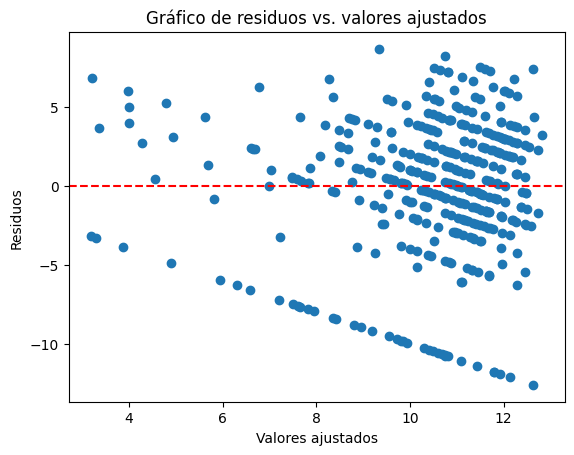

In [26]:
### Gráfico de residuos


import matplotlib.pyplot as plt

# Valores ajustados por el modelo
fitted_vals = resultado.fittedvalues

# Residuos del modelo
residuals = resultado.resid

# Graficar residuos vs. valores ajustados
plt.scatter(fitted_vals, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores ajustados')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [27]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Residuos del modelo
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuals, X)

# Resultados de la prueba de Breusch-Pagan
print(f"LM Statistic: {lm}, LM p-value: {lm_pvalue}")
print(f"F-Statistic: {fvalue}, F p-value: {f_pvalue}")

LM Statistic: 4.760038347993824, LM p-value: 0.5749376716959065
F-Statistic: 0.7887859866201005, F p-value: 0.5791069618720728


p-valor: Ambos p-valores (0.5749 para la LM Statistic y 0.5791 para la F-Statistic) son mucho mayores a 0.05. Esto significa que no hay evidencia estadísticamente significativa de heteroscedasticidad en el modelo según esta prueba.

### REGRESIÓN 2 PARA SABER SI PASÓ





In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Crear la variable dependiente (1 si suma >= 40, 0 si es menor)
datos['aprobado'] = np.where(datos[['G1', 'G2', 'G3']].sum(axis=1) >= 40, 1, 0)

# Seleccionar las variables predictoras
X = datos[['failures', 'Medu', 'Fedu', 'studytime', 'goout', 'Dalc']]

# Variable dependiente
y = datos['aprobado']

# Añadir la constante al modelo (intercepto)
X = sm.add_constant(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión logística
modelo_logistico = sm.Logit(y_train, X_train)
resultado_logit = modelo_logistico.fit()

# Imprimir el resumen del modelo
print(resultado_logit.summary())

# Hacer predicciones en el conjunto de prueba
y_pred = resultado_logit.predict(X_test)

# Convertir las probabilidades a 0 y 1 (umbral de 0.5)
y_pred_clasificado = np.where(y_pred >= 0.5, 1, 0)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_clasificado)
conf_matrix = confusion_matrix(y_test, y_pred_clasificado)

print(f"Precisión del modelo: {accuracy}")
print(f"Matriz de confusión:\n {conf_matrix}")


Optimization terminated successfully.
         Current function value: 0.511621
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               aprobado   No. Observations:                  276
Model:                          Logit   Df Residuals:                      269
Method:                           MLE   Df Model:                            6
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                 0.09652
Time:                        21:44:22   Log-Likelihood:                -141.21
converged:                       True   LL-Null:                       -156.29
Covariance Type:            nonrobust   LLR p-value:                 3.645e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4805      0.818     -1.810      0.070      -3.084       0.123
failures      -0.9664      0.